<a href="https://colab.research.google.com/github/HMUNACHI/number_classification_using_pytorch/blob/master/Number_Classification_Software.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Loss:  {1.8955140176104075}
Training Loss:  {0.836020093387378}
Training Loss:  {0.5107707623829211}
Training Loss:  {0.41907698848544916}
Training Loss:  {0.3776674202637378}
Training Loss:  {0.35253586401658527}
Training Loss:  {0.334266469406802}
Training Loss:  {0.32008615592871903}
Training Loss:  {0.3076279849401796}
Training Loss:  {0.2974718222057006}
Training Loss:  {0.2881768474271938}
Training Loss:  {0.27942090679301634}
Training Loss:  {0.27154544674590836}
Training Loss:  {0.2638492909972983}
Training Loss:  {0.25668007036103113}
Training Loss:  {0.2502626021946671}
Training Loss:  {0.2437515194251784}
Training Loss:  {0.2374628885452554}
Training Loss:  {0.2319050473468835}
Training Loss:  {0.22620301617424626}


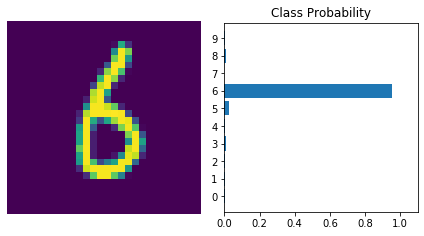

In [4]:
# imports the dependencies
%matplotlib inline
import helper
from __future__ import print_function
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import optim

# this would transform the data to tensors and normalise the data
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,),(0.5,))
                                ])

# loading the dataset from MNIST
trainset = datasets.MNIST('-/.pytorch/MNIST_data/', 
                          download = True, 
                          train = True, 
                          transform = transform)

# shuffles and loads the data in batches of 64
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size = 64, 
                                          shuffle = True)
# defines the model
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))

# sets the criterion, optimiser and epochs
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)
epochs = 20


# training begins
for e in range(epochs):
    running_loss = 0

    for images, labels in trainloader: 

        # flattens the images to a one dimensional array
        images = images.view(images.shape[0], -1)

        # clears the gradients
        optimizer.zero_grad()

        # forward pass
        output = model.forward(images)
        
        # calculate the loss
        loss = criterion(output, labels)
        
        # back propagation
        loss.backward()
        
        #adjust weights
        optimizer.step()
        
        # updates the running loss
        running_loss += loss.item()
    
    # prints the running loss as the model is trained
    else: print(f"Training Loss: ", {running_loss/len(trainloader)})

# testing how well the model predicts mumbers
images, labels = next(iter(trainloader))
img = images[0].view(1,784)

with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits,dim=1)
helper.view_classify(img.view(1,28,28), ps)